In [17]:
NombrePersonnes=500 #nombre de personnes
NombreConnexionsInit=500 #nombre de connexions initiales
ProbaConnexion=0.5 #proba de se connecter si il y a connection commune
ScoreMini=10 #score mini exigé pour se connecter
NombreAttributs=100 #nombre d'attibuts 
NombreAttributsPersonne=40 #nombre d'attributs par personne

In [18]:
import random
from operator import itemgetter
import matplotlib.pyplot as plt
import networkx as nx

In [19]:
class MonGraphe :
    
    def __init__(self):

        self.graph ={}
        self.nodes=[]
        self.edges=[]
        self.EdgesType=[]
        
        
    def score (self, i, j):
        return (len(set(self.graph[i][0]).intersection(self.graph[j][0])))
    
    def CreerConnexion (self, i, j , n):

        self.graph[i][1].append([j,list(set(self.graph[i][0]).intersection(self.graph[j][0])),MonGraphe.score(self, i ,j),n])
        self.graph[j][1].append([i,list(set(self.graph[j][0]).intersection(self.graph[i][0])),MonGraphe.score(self, i ,j),n])
        self.edges.append((i,j))
        self.EdgesType.append(n)
    
    def CreerConnexionInitialeAttributs(self, NombrePersonnes, NombreAttributs, NombreAttributsPersonne, NombreConnexionsInit):
            
        self.NombrePersonnes= NombrePersonnes
        self.NombreAttributs= NombreAttributs
        self.NombreAttributsPersonne= NombreAttributsPersonne
        
        # on donne à chaque personne leurs "NombreAttributsPersonne" attributs parmit les "NombreAttributs" disponibles 
        for i in range(self.NombrePersonnes) :
            self.nodes.append(i)
            self.graph[i] = [random.sample(range(1,NombreAttributs), NombreAttributsPersonne),[]]
            
        scores=[]
        for i in range (NombrePersonnes):
            for j in range(i):
                scores.append([[i,j],MonGraphe.score(self, i ,j)])
        ScoresUtiles= sorted (scores, key=itemgetter(1),reverse = True) [:NombreConnexionsInit]
        for vect in ScoresUtiles :
            i,j=vect[0]
            MonGraphe.CreerConnexion(self,i,j,0)
    
    
    def ProcessOfEvolution (self, ProbaConnexion, NombreIterations=1 ):
        for i in range (NombreIterations):
            print(i,"ok")
            MonGraphe.Evolution(self, ProbaConnexion)
        
    def Evolution (self, ProbaConnexion):
        NouvelleConnexion = []
        for i in range (self.NombrePersonnes):
            for j in range(i):
                scores=[]
                liste_i=[self.graph[i][1][k][0] for k in range(len(self.graph[i][1]))]
                liste_j=[self.graph[j][1][k][0] for k in range(len(self.graph[j][1]))]
                if not j in liste_i :
                    if len(set(liste_i).intersection(liste_j)):
                        connexion_i=[liste[0] for liste in self.graph[i][1]]
                        connexion_j=[liste[0] for liste in self.graph[j][1]]
                        for k in set(liste_i).intersection(liste_j):
                            pos_i = connexion_i.index(k)
                            pos_j = connexion_j.index(k)
                            score= len(set(self.graph[i][1][pos_i][1]).intersection(self.graph[j][1][pos_j][1]))
                            scores.append([k,score])
                        scores = sorted (scores, key= itemgetter(1), reverse= True)
                        if len(scores):
                            MeilleurScore = sorted (scores, key= itemgetter(1), reverse= True)[0]
                            if MeilleurScore[1] > 13 :
                                NouvelleConnexion.append([i,j,1])
        for k in NouvelleConnexion:
            MonGraphe.CreerConnexion(self, *k)


    def AjoutCouleurs (self, ConnexionInitiale = 'k', ConnexionCree = 'b' ):
        self.EdgesColor=[]
        for i in self.EdgesType :
            if i == 0:
                self.EdgesColor.append( ConnexionInitiale )
            if i == 1:
                self.EdgesColor.append( ConnexionCree )


        
            
        

In [20]:
A= MonGraphe()
A.CreerConnexionInitialeAttributs( NombrePersonnes, NombreAttributs, NombreAttributsPersonne, NombreConnexionsInit)

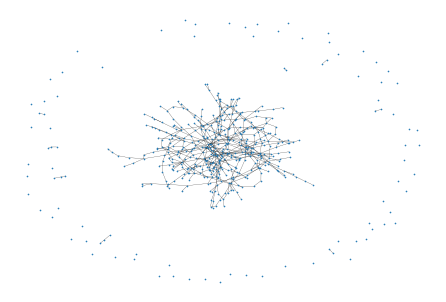

In [21]:
G = nx.Graph()
G.add_nodes_from(A.nodes)
G.add_edges_from(A.edges)
pos = nx.spring_layout(G)
nx.draw(G,pos,node_size = 0.4,width= 0.2)
plt.savefig("Initial.png") # save as png
plt.show() # display

In [22]:
pos

{0: array([-0.59949571, -0.70391876]),
 1: array([0.10519031, 0.11736798]),
 2: array([-0.07428997,  0.49311307]),
 3: array([ 0.20650652, -0.17097139]),
 4: array([ 0.46520659, -0.26263109]),
 5: array([ 0.00225338, -0.12948124]),
 6: array([0.06782189, 0.1958115 ]),
 7: array([-0.00093212,  0.1153202 ]),
 8: array([0.23320271, 0.19993632]),
 9: array([-0.27934128, -0.04166927]),
 10: array([-0.1249377 ,  0.26371586]),
 11: array([-0.23513834,  0.18018301]),
 12: array([-0.21214266, -0.03221282]),
 13: array([-0.39114431, -0.25650242]),
 14: array([-0.00189046,  0.2197458 ]),
 15: array([ 0.13553178, -0.21319667]),
 16: array([-0.04410071, -0.00022363]),
 17: array([ 1.60170035e-04, -9.91003454e-01]),
 18: array([ 0.36445993, -0.18134464]),
 19: array([0.34238568, 0.07533895]),
 20: array([-0.06442338,  0.08955306]),
 21: array([ 0.05799839, -0.03664018]),
 22: array([-0.26425612, -0.27384025]),
 23: array([-0.03782966, -0.20300189]),
 24: array([ 0.19412577, -0.13634475]),
 25: array

In [15]:
A.ProcessOfEvolution(ProbaConnexion,10)

0 ok
1 ok
2 ok
3 ok
4 ok
5 ok
6 ok
7 ok
8 ok
9 ok


C:\Users\mathi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


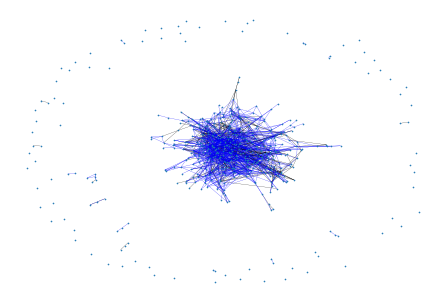

In [16]:
A.AjoutCouleurs()
G = nx.Graph()
G.add_nodes_from(A.nodes)
G.add_edges_from(A.edges)
nx.draw(G,pos,node_size = 0.4,width= 0.2,edge_color= list(A.EdgesColor))
plt.savefig("Final.png") # save as png
plt.show() # display